In [3]:
# For GPU users
!pip install tensorflow[and-cuda]
# For CPU users
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip3 install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [6]:
!pip install mediapipe

Defaulting to user installation because normal site-packages is not writeable


In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

2023-10-18 20:44:52.638235: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-18 20:44:52.662922: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-18 20:44:52.868993: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-18 20:44:52.870632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-18 20:44:54.240582: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [8]:
mp_holistic  = mp.solutions.holistic #holistic model
mp_drawing = mp.solutions.drawing_utils #utilidades de dibujo

In [9]:
def mediapipe_detection(image,model):
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # convierte de BGR a RGB
    image.flags.writeable = False  #La imagen no es writeable
    results = model.process(image)  #image es el frame del open cv, hace la prediccion
    image.flags.writeable = True     #la imagen es writable 
    image = cv2.cvtColor(image,cv2.COLOR_RGB2BGR) #convierte de RGB a BGR
    return image,results 


In [10]:
def draw_landmarks(image,results): #dibujar las marcas en la imagen
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION) #dibuja las conecciones de la cara
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS) #Dibuja las pose conecciones
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #dibuja las conecciones de la mano izquierda
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS) #dibuja las conecciones de la mano derecha 

    

In [11]:
def draw_styled_landmarks(image,results): #dibuja los landmarks refinados 
    mp_drawing.draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION,mp_drawing.DrawingSpec(color=(50,110,10),thickness=1,circle_radius=1),mp_drawing.DrawingSpec(color=(80,256,121),thickness=1,circle_radius=1)) #dibuja las conecciones de la cara
    mp_drawing.draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,10),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(80,44,121),thickness=2,circle_radius=2)) #Dibuja las pose conecciones
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(80,22,76),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(121,44,250),thickness=2,circle_radius=2)) #dibuja las conecciones de la mano izquierda
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS,mp_drawing.DrawingSpec(color=(254,117,66),thickness=2,circle_radius=4),mp_drawing.DrawingSpec(color=(245,66,230),thickness=2,circle_radius=2)) #dibuja las conecciones de la mano derecha 


In [83]:
#abre la webcam y va entre los frames
cap = cv2.VideoCapture(0)
#setteamos el modelo de mediapipe
with mp_holistic.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
  while cap.isOpened():
    #lee el feed
    ret,frame = cap.read()

    #hace la deteccion
    image, results = mediapipe_detection(frame,holistic)
    print(results)
    #dibuja  los landmarks
    draw_styled_landmarks(image,results)
    #Lo muestra en la pantalla
    cv2.imshow('OpenCV Feed',image)

    #Rompe el loop si se apreta q
    if cv2.waitKey(10) & 0xFF == ord('q'):
      break
  cap.release()
  cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [94]:
len(results.face_landmarks.landmark)

468

In [87]:
results

mediapipe.python.solution_base.SolutionOutputs

In [85]:
draw_landmarks(frame,results)

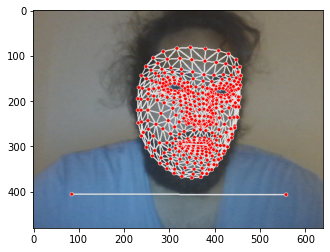

In [95]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [88]:
results.face_landmarks

landmark {
  x: 0.5752395987510681
  y: 0.587821364402771
  z: -0.04350768402218819
}
landmark {
  x: 0.5880329608917236
  y: 0.5100672245025635
  z: -0.08144702017307281
}
landmark {
  x: 0.5785813927650452
  y: 0.5324903130531311
  z: -0.042502082884311676
}
landmark {
  x: 0.5740495920181274
  y: 0.43228209018707275
  z: -0.06491772830486298
}
landmark {
  x: 0.5904668569564819
  y: 0.4866473078727722
  z: -0.08680378645658493
}
landmark {
  x: 0.5901114344596863
  y: 0.45567774772644043
  z: -0.08084872364997864
}
landmark {
  x: 0.5857378244400024
  y: 0.3808134198188782
  z: -0.04078347980976105
}
landmark {
  x: 0.45842215418815613
  y: 0.35807502269744873
  z: -0.004143063444644213
}
landmark {
  x: 0.5865084528923035
  y: 0.3266453146934509
  z: -0.031170841306447983
}
landmark {
  x: 0.5891372561454773
  y: 0.29606348276138306
  z: -0.034574080258607864
}
landmark {
  x: 0.5941133499145508
  y: 0.1774369776248932
  z: -0.018150541931390762
}
landmark {
  x: 0.5740891098976135

In [89]:
pose = [] #array para gaursar los landmarks
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [68]:
pose

array([ 2.89055169e-01,  3.78342956e-01, -8.35365474e-01,  9.96467352e-01,
        3.17581236e-01,  3.12025815e-01, -7.65902638e-01,  9.94144619e-01,
        3.37769687e-01,  3.14274579e-01, -7.65833974e-01,  9.94198382e-01,
        3.57803166e-01,  3.16821694e-01, -7.65322685e-01,  9.93845046e-01,
        2.51637459e-01,  3.06147397e-01, -7.70080924e-01,  9.95598674e-01,
        2.26738170e-01,  3.05977494e-01, -7.69008040e-01,  9.96013761e-01,
        2.04342157e-01,  3.07971358e-01, -7.69399762e-01,  9.96436059e-01,
        3.83464396e-01,  3.67026776e-01, -3.97572041e-01,  9.93027091e-01,
        1.64997339e-01,  3.53515655e-01, -4.01707739e-01,  9.96769488e-01,
        3.26533496e-01,  4.64047104e-01, -6.99848413e-01,  9.97537494e-01,
        2.51506716e-01,  4.56975907e-01, -7.04687953e-01,  9.98225570e-01,
        5.22375166e-01,  8.04329038e-01, -2.55962670e-01,  9.90620732e-01,
        2.33418657e-03,  7.49985337e-01, -1.87362000e-01,  9.81038928e-01,
        7.20108509e-01,  

In [99]:
pose = np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)#todos los landmarks en un solo array grande
face = np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)#todos los landmarks en un solo array grande
lh = np.array([[res.x,res.y,res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
rh = np.array([[res.x,res.y,res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande

In [101]:

def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility]for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)#todos los landmarks en un solo array grande
    face = np.array([[res.x,res.y,res.z]for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)#todos los landmarks en un solo array grande
    lh = np.array([[res.x,res.y,res.z]for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
    rh = np.array([[res.x,res.y,res.z]for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)#todos los landmarks en un solo array grande
    return np.concatenate([pose,face,lh,rh])
    

In [104]:
extract_keypoints(results).shape

(1662,)

In [ ]:
#path para la data exportada
DATA_PATH = os.path.join('MP_Data') # variable que guarda 

#Aciones detectadas
actions = np.array(['hello','thanks','iloveyou'])
no_sequences = 30 #Cantidad de videos que se recolectaran por accion
sequence_length = 30 #30 es la cantidad de frames de data que va a utilizar 
#lo que se hara para la info es recolectar 30 videos de 30 frames cada un por accion (son 3 acciones) por la cantidad de keypoints que se tienen que son 1662 (entre todas las  variables)